1. What is the distribution of the number of adults in bookings?


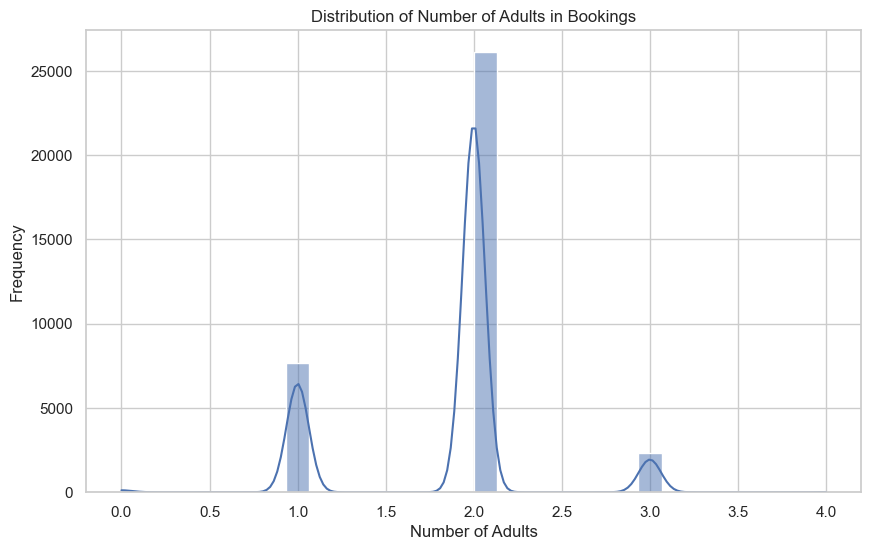

In [5]:
import pandas as pd

# Load the data from the Excel file
file_path = "E:/DS activities/ML/assignment/Hotel_Reservations_Encoded.xlsx"
hotel_data = pd.read_excel(file_path)

# Display the first few rows of the dataframe to understand its structure
hotel_data.head()
import matplotlib.pyplot as plt
import seaborn as sns

# Setting the aesthetic style of the plots
sns.set(style="whitegrid")

# Plotting the distribution of the number of adults in bookings
plt.figure(figsize=(10, 6))
sns.histplot(hotel_data['no_of_adults'], kde=True, bins=30)
plt.title('Distribution of Number of Adults in Bookings')
plt.xlabel('Number of Adults')
plt.ylabel('Frequency')
plt.show()


2. How do weekend and weekday bookings compare?

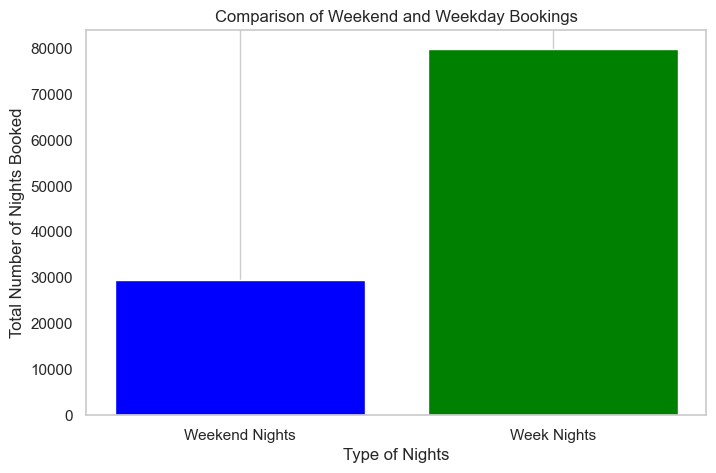

In [2]:
# Calculate total number of weekend nights and week nights
total_weekend_nights = hotel_data['no_of_weekend_nights'].sum()
total_week_nights = hotel_data['no_of_week_nights'].sum()

# Data for plotting
categories = ['Weekend Nights', 'Week Nights']
values = [total_weekend_nights, total_week_nights]

# Creating the bar plot
plt.figure(figsize=(8, 5))
plt.bar(categories, values, color=['blue', 'green'])
plt.xlabel('Type of Nights')
plt.ylabel('Total Number of Nights Booked')
plt.title('Comparison of Weekend and Weekday Bookings')
plt.xticks(categories)
plt.grid(axis='y')

# Display the plot
plt.show()


3. What is the distribution of lead times for bookings?


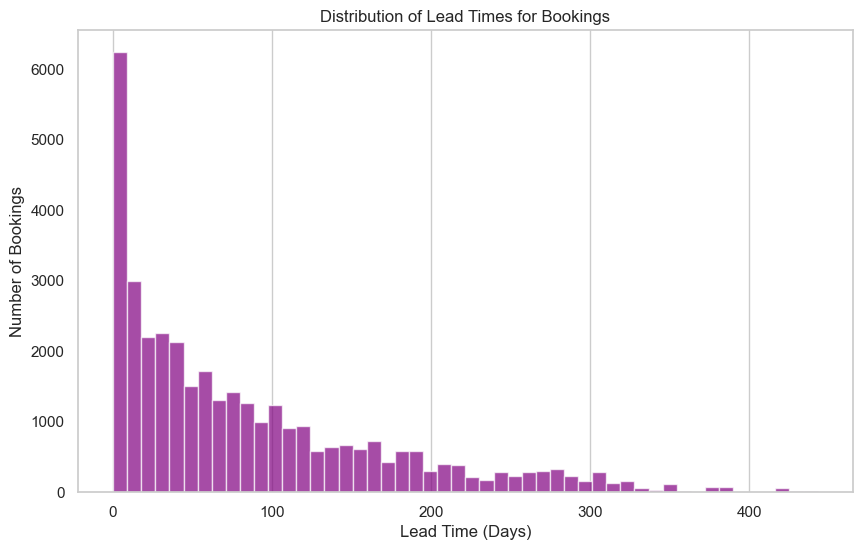

In [3]:
# Creating a histogram for the distribution of lead times
plt.figure(figsize=(10, 6))
plt.hist(hotel_data['lead_time'], bins=50, color='purple', alpha=0.7)
plt.xlabel('Lead Time (Days)')
plt.ylabel('Number of Bookings')
plt.title('Distribution of Lead Times for Bookings')
plt.grid(axis='y')

# Display the histogram
plt.show()

4. Average price per room varying by month and year.


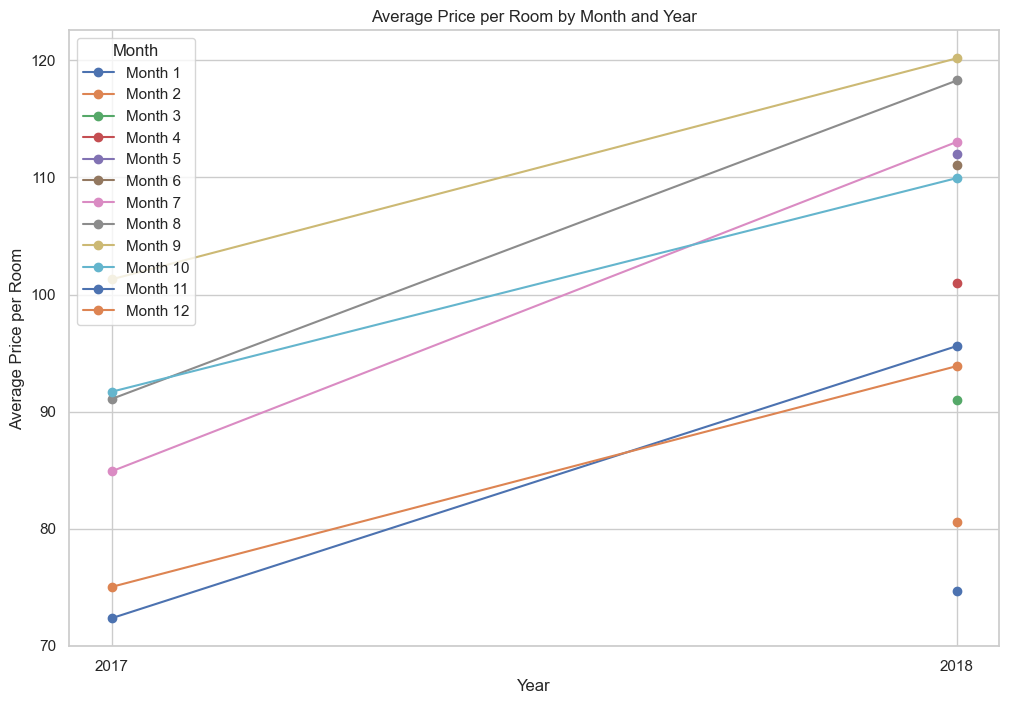

In [4]:
# Grouping data by arrival year and month to calculate the average price per room
avg_price_month_year = hotel_data.groupby(['arrival_year', 'arrival_month'])['avg_price_per_room'].mean().unstack()

# Plotting the data
plt.figure(figsize=(12, 8))
avg_price_month_year.plot(kind='line', marker='o', ax=plt.gca())
plt.title('Average Price per Room by Month and Year')
plt.xlabel('Year')
plt.ylabel('Average Price per Room')
plt.xticks(avg_price_month_year.index)
plt.legend(title='Month', labels=[f'Month {i}' for i in range(1, 13)])
plt.grid(True)

# Display the plot
plt.show()


5. What are the peak months for hotel bookings?


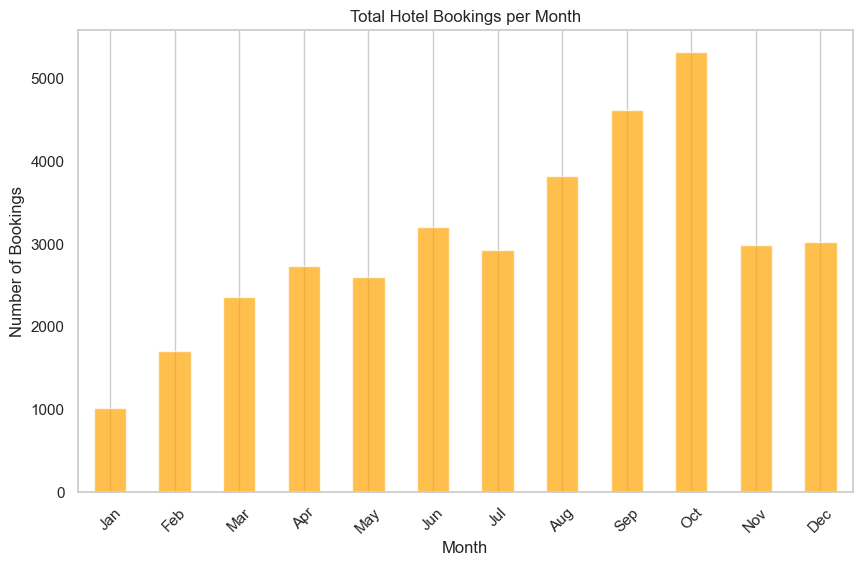

In [5]:
# Aggregating total number of bookings for each month across all years
bookings_per_month = hotel_data.groupby('arrival_month')['Booking_ID'].count()

# Plotting the data
plt.figure(figsize=(10, 6))
bookings_per_month.plot(kind='bar', color='orange', alpha=0.7)
plt.title('Total Hotel Bookings per Month')
plt.xlabel('Month')
plt.ylabel('Number of Bookings')
plt.xticks(range(12), ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'], rotation=45)
plt.grid(axis='y')

# Display the plot
plt.show()


6. Is there a significant difference in cancellation rates between different room types?


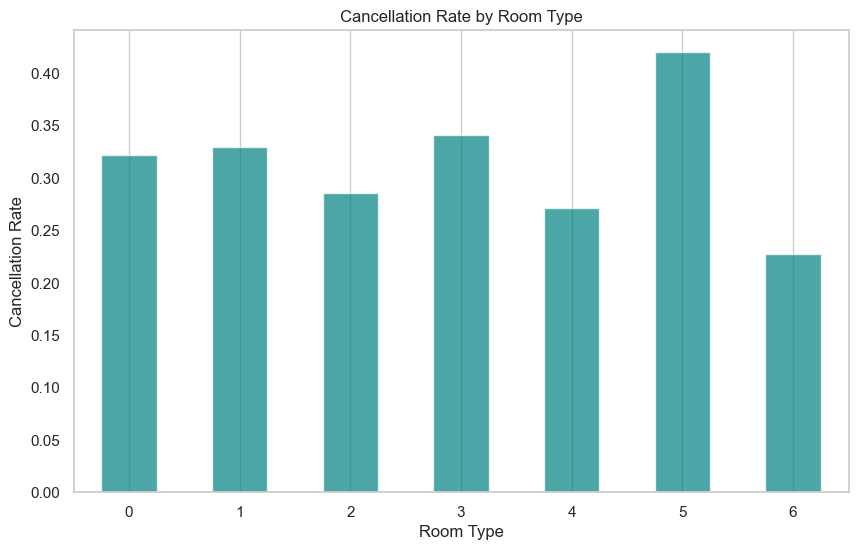

,total_bookings,canceled_bookings,cancellation_rate
room_type_reserved,,,
0,28130,9072,0.322503
1,692,228,0.329480
2,7,2,0.285714
3,6057,2069,0.341588
4,265,72,0.271698
5,966,406,0.420290
6,158,36,0.227848


In [9]:
# Assuming 'booking_status' column indicates whether a booking was canceled (0 for canceled, 1 for not canceled)
# First, we need to group the data by room type and calculate the total and canceled bookings for each type
room_type_stats = hotel_data.groupby('room_type_reserved').agg(
    total_bookings=pd.NamedAgg(column='Booking_ID', aggfunc='count'),
    canceled_bookings=pd.NamedAgg(column='booking_status', aggfunc=lambda x: (x == 0).sum())
)

# Calculating cancellation rate for each room type
room_type_stats['cancellation_rate'] = room_type_stats['canceled_bookings'] / room_type_stats['total_bookings']

# Plotting the cancellation rates for each room type
plt.figure(figsize=(10, 6))
room_type_stats['cancellation_rate'].plot(kind='bar', color='teal', alpha=0.7)
plt.title('Cancellation Rate by Room Type')
plt.xlabel('Room Type')
plt.ylabel('Cancellation Rate')
plt.xticks(rotation=0)
plt.grid(axis='y')

# Display the plot
plt.show()
room_type_stats[['total_bookings', 'canceled_bookings', 'cancellation_rate']]



7. Do repeat guests have a lower cancellation rate than new guests?


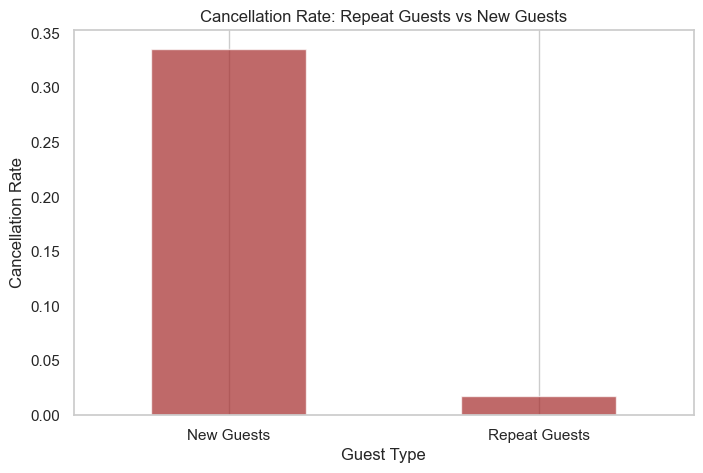

,total_bookings,canceled_bookings,cancellation_rate
New Guests,35345,11869,0.335804
Repeat Guests,930,16,0.017204


In [8]:
# Assuming 'repeated_guest' column indicates whether a guest is a repeat (1) or new (0) guest
# and 'booking_status' column indicates whether a booking was canceled (0 for canceled, 1 for not canceled)

# Grouping data by guest type (repeat or new) and calculating the total and canceled bookings for each type
guest_type_stats = hotel_data.groupby('repeated_guest').agg(
    total_bookings=pd.NamedAgg(column='Booking_ID', aggfunc='count'),
    canceled_bookings=pd.NamedAgg(column='booking_status', aggfunc=lambda x: (x == 0).sum())
)

# Calculating cancellation rate for each guest type
guest_type_stats['cancellation_rate'] = guest_type_stats['canceled_bookings'] / guest_type_stats['total_bookings']

# Renaming index for clarity in the plot
guest_type_stats.index = ['New Guests', 'Repeat Guests']

# Plotting the cancellation rates for repeat and new guests
plt.figure(figsize=(8, 5))
guest_type_stats['cancellation_rate'].plot(kind='bar', color='brown', alpha=0.7)
plt.title('Cancellation Rate: Repeat Guests vs New Guests')
plt.xlabel('Guest Type')
plt.ylabel('Cancellation Rate')
plt.xticks(rotation=0)
plt.grid(axis='y')

# Display the plot
plt.show()

# Also, show the calculated rates in a table format for clarity
guest_type_stats[['total_bookings', 'canceled_bookings', 'cancellation_rate']]


8. Does the number of special requests correlate with cancellation rates?


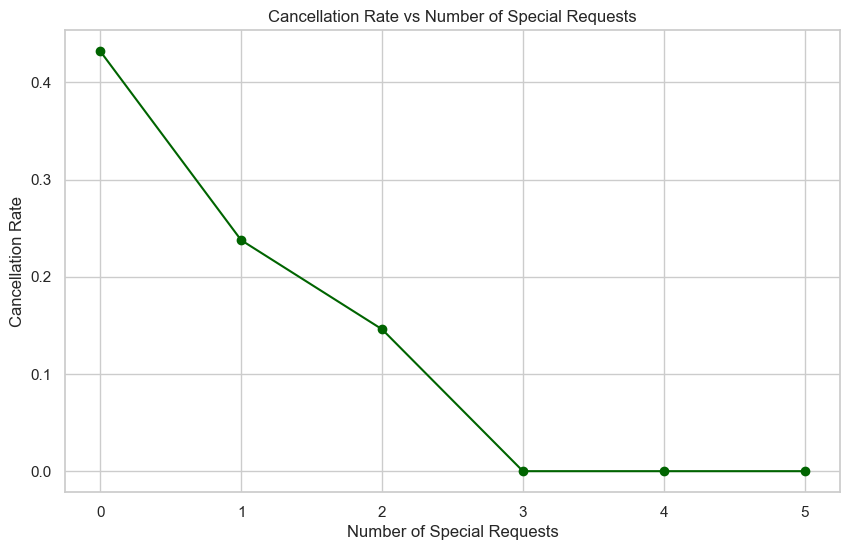

In [11]:
# Assuming 'no_of_special_requests' indicates the number of special requests made for each booking
# and 'booking_status' indicates whether a booking was canceled (0 for canceled, 1 for not canceled)

# Grouping data by the number of special requests and calculating the total and canceled bookings for each level
special_request_stats = hotel_data.groupby('no_of_special_requests').agg(
    total_bookings=pd.NamedAgg(column='Booking_ID', aggfunc='count'),
    canceled_bookings=pd.NamedAgg(column='booking_status', aggfunc=lambda x: (x == 0).sum())
)

# Calculating cancellation rate for each level of special requests
special_request_stats['cancellation_rate'] = special_request_stats['canceled_bookings'] / special_request_stats['total_bookings']

# Plotting the cancellation rates for different levels of special requests
plt.figure(figsize=(10, 6))
special_request_stats['cancellation_rate'].plot(kind='line', marker='o', color='darkgreen')
plt.title('Cancellation Rate vs Number of Special Requests')
plt.xlabel('Number of Special Requests')
plt.ylabel('Cancellation Rate')
plt.grid(True)

# Display the plot
plt.show()



9. Are there trends or patterns in the arrival dates?



C:\Users\Tab & Tech\AppData\Local\Temp\ipykernel_3132\2346372811.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='arrival_date', data=hotel_data, palette='viridis')


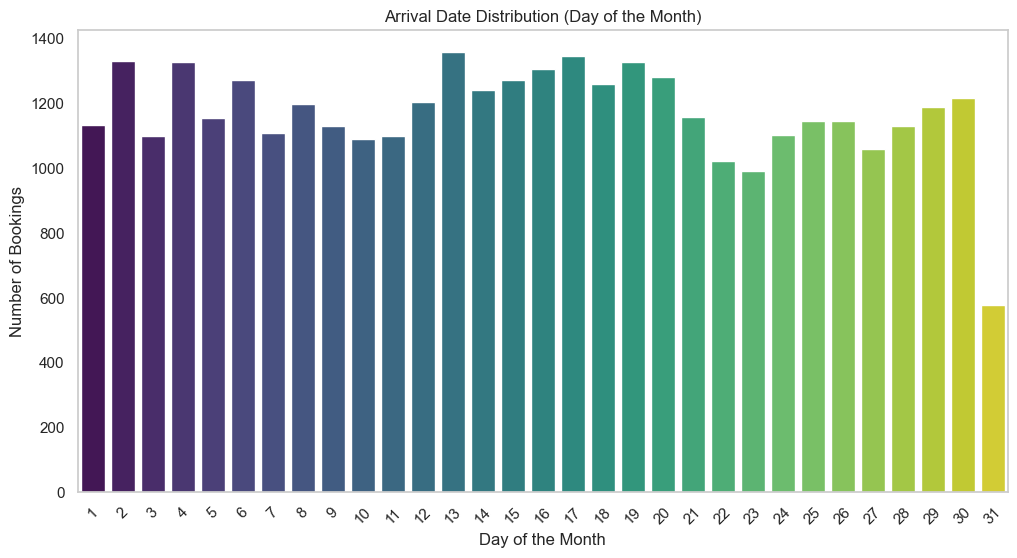

In [6]:
import seaborn as sns

# Analyzing trends for the day of the month
plt.figure(figsize=(12, 6))
sns.countplot(x='arrival_date', data=hotel_data, palette='viridis')
plt.title('Arrival Date Distribution (Day of the Month)')
plt.xlabel('Day of the Month')
plt.ylabel('Number of Bookings')
plt.xticks(rotation=45)
plt.grid(axis='y')

# Display the plot
plt.show()

In [8]:
# Checking the data types of the columns related to the arrival date
arrival_date_data_types = hotel_data[['arrival_year', 'arrival_month', 'arrival_date']]
arrival_date_data_types

,arrival_year,arrival_month,arrival_date
0,2017,10,2
1,2018,11,6
2,2018,2,28
3,2018,5,20
4,2018,4,11
...,...,...,...
36270,2018,8,3
36271,2018,10,17
36272,2018,7,1
36273,2018,4,21


10. Arrival by day of the weeks

C:\Users\Tab & Tech\AppData\Local\Temp\ipykernel_3132\1138419979.py:23: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='arrival_day_of_week', data=hotel_data, palette='Set2')


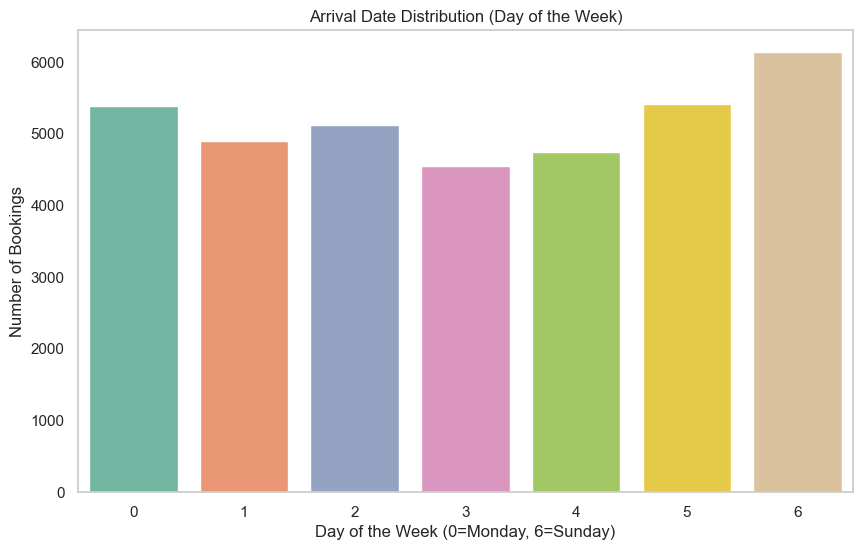

In [10]:
# Implementing a more robust approach for date construction that handles invalid date combinations
from pandas.errors import OutOfBoundsDatetime

# Function to safely construct a date and handle invalid combinations
def safe_construct_date(row):
    try:
        return pd.Timestamp(year=row['arrival_year'], month=row['arrival_month'], day=row['arrival_date'])
    except ValueError:
        # Return NaT (Not a Time) for invalid date combinations
        return pd.NaT

# Applying the function to construct the full arrival date
hotel_data['full_arrival_date'] = hotel_data.apply(safe_construct_date, axis=1)

# Dropping rows where the date couldn't be constructed (if any)
hotel_data = hotel_data.dropna(subset=['full_arrival_date'])

# Extracting the day of the week (0 = Monday, 6 = Sunday)
hotel_data['arrival_day_of_week'] = hotel_data['full_arrival_date'].dt.dayofweek

# Analyzing trends for the day of the week
plt.figure(figsize=(10, 6))
sns.countplot(x='arrival_day_of_week', data=hotel_data, palette='Set2')
plt.title('Arrival Date Distribution (Day of the Week)')
plt.xlabel('Day of the Week (0=Monday, 6=Sunday)')
plt.ylabel('Number of Bookings')
plt.grid(axis='y')

# Display the plot
plt.show()


11. Arrival by month.

C:\Users\Tab & Tech\AppData\Local\Temp\ipykernel_3132\593466807.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='arrival_month', data=hotel_data, palette='coolwarm')


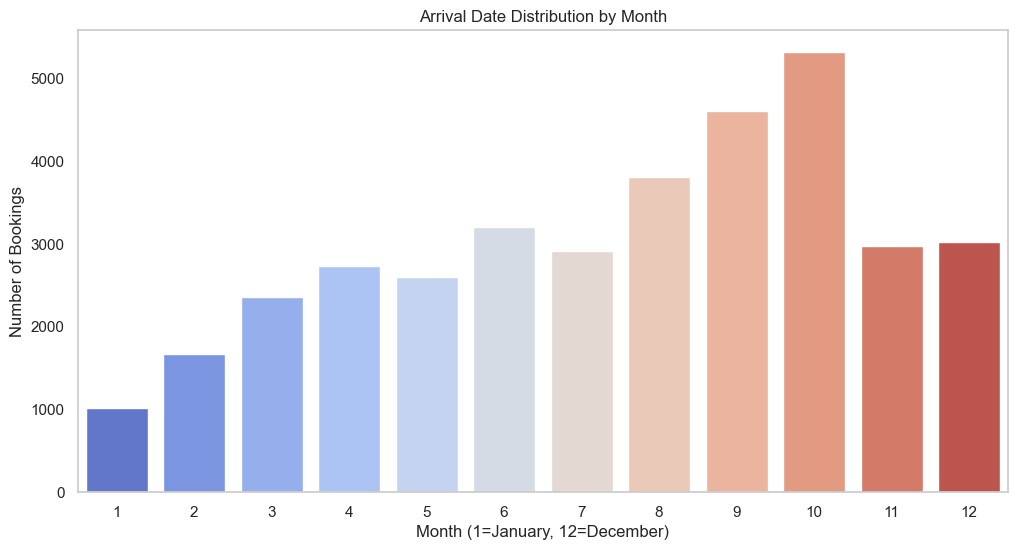

In [11]:
# Analyzing trends for monthly arrivals
plt.figure(figsize=(12, 6))
sns.countplot(x='arrival_month', data=hotel_data, palette='coolwarm')
plt.title('Arrival Date Distribution by Month')
plt.xlabel('Month (1=January, 12=December)')
plt.ylabel('Number of Bookings')
plt.grid(axis='y')

# Display the plot
plt.show()


12. Does the length of stay (weekends vs. weekdays) impact cancellation rates?


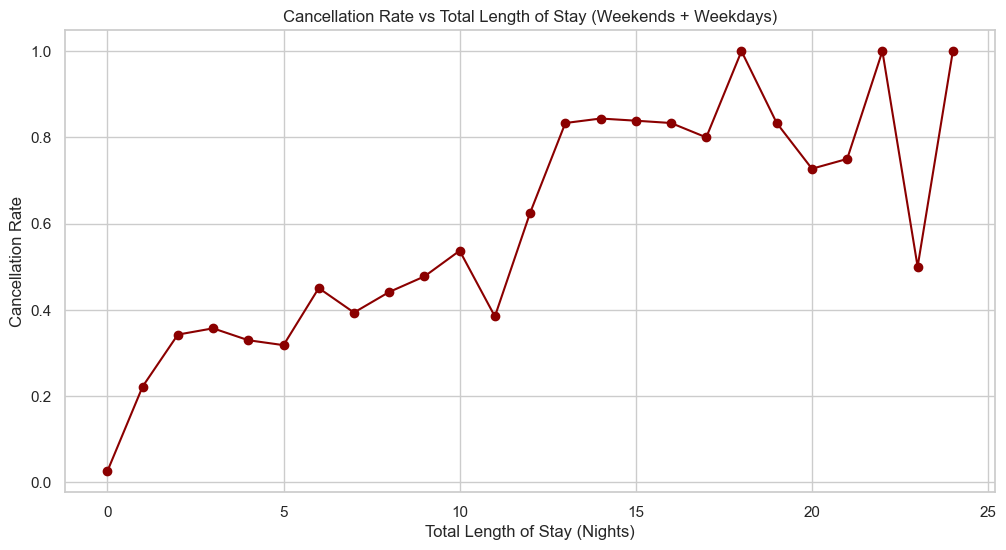

In [13]:
# Creating a new column that represents the total length of stay (weekend nights + week nights)
hotel_data['total_length_of_stay'] = hotel_data['no_of_weekend_nights'] + hotel_data['no_of_week_nights']

# Grouping data by the total length of stay and calculating the total and canceled bookings for each length
length_of_stay_stats = hotel_data.groupby('total_length_of_stay').agg(
    total_bookings=pd.NamedAgg(column='Booking_ID', aggfunc='count'),
    canceled_bookings=pd.NamedAgg(column='booking_status', aggfunc=lambda x: (x == 0).sum())
)

# Calculating cancellation rate for each length of stay
length_of_stay_stats['cancellation_rate'] = length_of_stay_stats['canceled_bookings'] / length_of_stay_stats['total_bookings']

# Plotting the cancellation rates for different lengths of stay
plt.figure(figsize=(12, 6))
length_of_stay_stats['cancellation_rate'].plot(kind='line', marker='o', color='darkred')
plt.title('Cancellation Rate vs Total Length of Stay (Weekends + Weekdays)')
plt.xlabel('Total Length of Stay (Nights)')
plt.ylabel('Cancellation Rate')
plt.grid(True)

# Display the plot
plt.show()



13. Effect of Special Requests on Repeat Guests


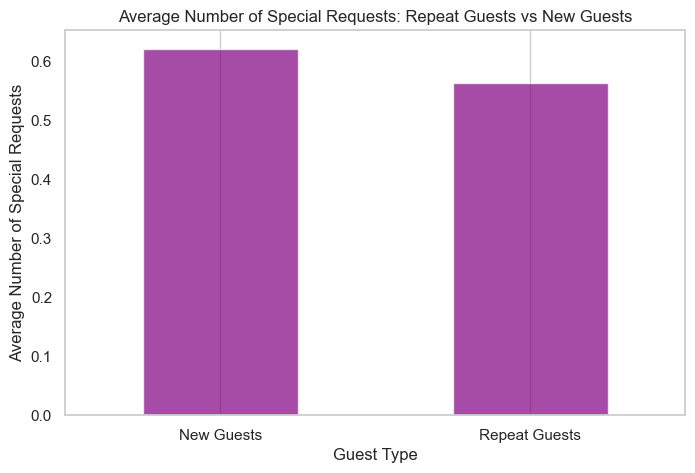

In [15]:
# Grouping data by guest type (repeat or new) and calculating the average number of special requests for each type
special_request_guest_stats = hotel_data.groupby('repeated_guest')['no_of_special_requests'].mean()

# Renaming index for clarity in the plot
special_request_guest_stats.index = ['New Guests', 'Repeat Guests']

# Plotting the average number of special requests for repeat and new guests
plt.figure(figsize=(8, 5))
special_request_guest_stats.plot(kind='bar', color='purple', alpha=0.7)
plt.title('Average Number of Special Requests: Repeat Guests vs New Guests')
plt.xlabel('Guest Type')
plt.ylabel('Average Number of Special Requests')
plt.xticks(rotation=0)
plt.grid(axis='y')

# Display the plot
plt.show()




14. How does the average price per room vary with the number of special requests made by guests?

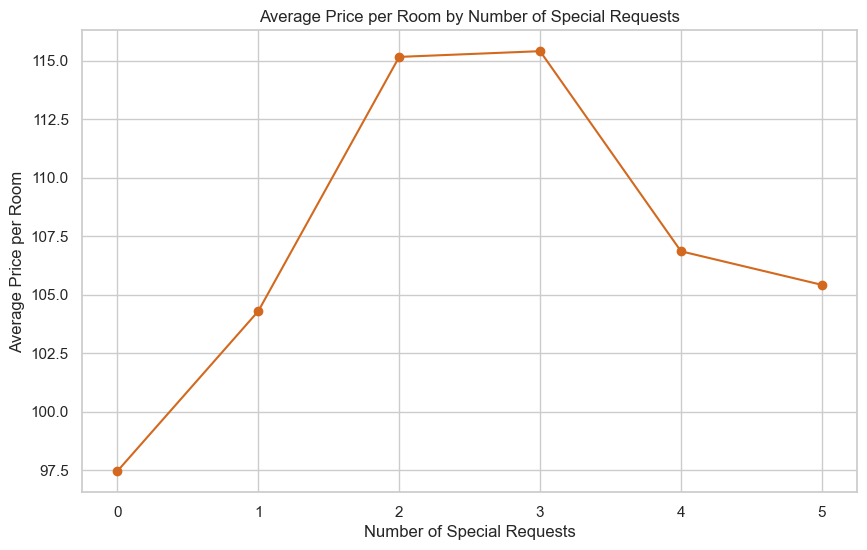

,avg_price_per_room
no_of_special_requests,
0,97.453556
1,104.290994
2,115.158978
3,115.403615
4,106.851538
5,105.416250


In [18]:
# Calculating the average price per room for different levels of special requests
average_price_by_special_requests = hotel_data.groupby('no_of_special_requests')['avg_price_per_room'].mean()

# Plotting the average price per room by the number of special requests
plt.figure(figsize=(10, 6))
average_price_by_special_requests.plot(kind='line', marker='o', color='chocolate')
plt.title('Average Price per Room by Number of Special Requests')
plt.xlabel('Number of Special Requests')
plt.ylabel('Average Price per Room')
plt.grid(True)

# Display the plot
plt.show()

# Showing the calculated averages in a table format for clarity
average_price_by_special_requests.to_frame()


15. Revenue Analysis by Room Type

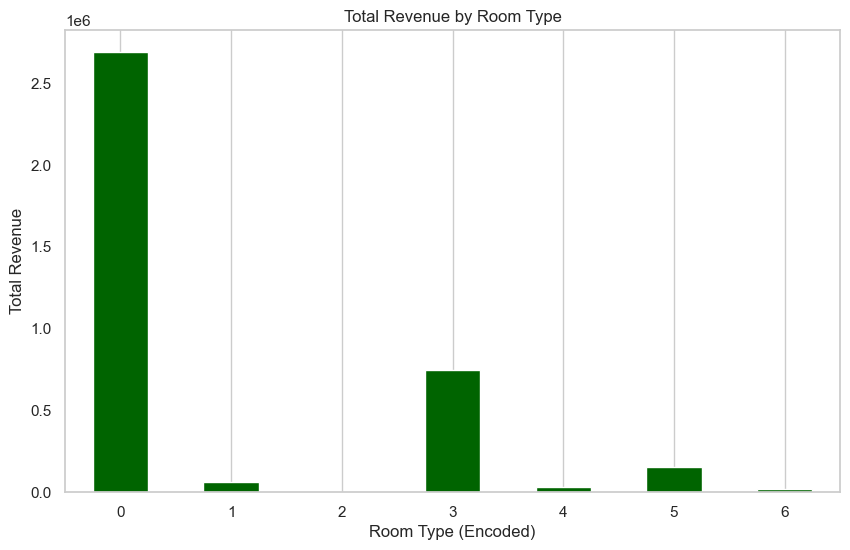

,avg_price_per_room
room_type_reserved,
0,2688636.50
1,60026.69
2,515.75
3,748364.71
4,31182.66
5,151885.26
6,18765.99


In [17]:
# Correcting the approach for Revenue Analysis by Room Type
# Calculating the number of bookings for each room type
bookings_by_room_type = hotel_data.groupby('room_type_reserved')['Booking_ID'].count()

# Calculating the total revenue for each room type (average price per room * number of bookings)
total_revenue_by_room_type = hotel_data.groupby('room_type_reserved')['avg_price_per_room'].sum()

# Plotting total revenue by room type
plt.figure(figsize=(10, 6))
total_revenue_by_room_type.plot(kind='bar', color='darkgreen')
plt.title('Total Revenue by Room Type')
plt.xlabel('Room Type (Encoded)')
plt.ylabel('Total Revenue')
plt.xticks(rotation=0)
plt.grid(axis='y')

# Display the plot
plt.show()

# Showing the calculated total revenues in a table format for clarity
total_revenue_by_room_type.to_frame()
